<a href="https://colab.research.google.com/github/IlliaMushta/Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import random
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()

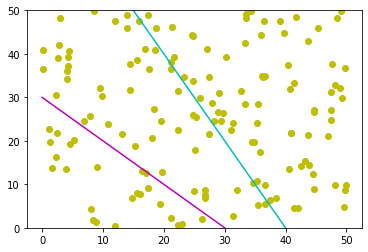

(150, 2) (150, 2)


In [2]:
x = np.random.rand(150)*50
y = np.random.rand(150)*50

data = list(zip(x,y))

for i, elem in enumerate(data):
    data[i] = np.array(data[i])
    if (elem[0] + elem[1] <= 30):
        data[i] = np.append(data[i],np.array((1.0,0.0), dtype=np.float32))
    elif (elem[0] + elem[1] > 30 and 2*elem[0] + elem[1] <= 80):
        data[i] = np.append(data[i],np.array((1.0,1.0), dtype=np.float32))
    elif (2*elem[0] + elem[1] > 80):
        data[i] = np.append(data[i],np.array((0.0,1.0), dtype=np.float32))
random.shuffle(data)
data = np.array(data,dtype=np.float32)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, c='y')

x0 = np.linspace(0, 50, 100)
div1y = 30 - x0
div2y = 80 - 2*x0
ax1.plot(x0,div1y,'m')
ax1.plot(x0,div2y,'c')
ax1.set_ylim(0,50)
plt.show()

x_train = data[:,:2]
y_train = data[:,2:4]

x_train = x_train.astype("float32")

print(x_train.shape,y_train.shape)

In [4]:
sess =tf.Session()
 
x_ = tf.placeholder(name="input", shape=[None, 2], dtype=tf.float32)
y_ = tf.placeholder(name= "output", shape=[None, 2], dtype=tf.float32)
 
w = tf.Variable(tf.random_normal(shape=[2, 2]))
b = tf.Variable(tf.constant(value=0.0, shape=[2], dtype=tf.float32))
nn_output = tf.nn.sigmoid(tf.add(tf.matmul(x_, w), b))
 
gd = tf.train.AdamOptimizer(0.001)
loss =  tf.reduce_mean(tf.square(nn_output- y_))+ 0.85* tf.nn.l2_loss(w) + 0.15* tf.reduce_mean(tf.abs(w))
train_step = gd.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

for _ in range(40000):
    sess.run(train_step, feed_dict={x_:x_train, y_:y_train})

In [5]:
weights = sess.run(w)
print(weights)

[[-0.13497353  0.08482892]
 [-0.05210221  0.09435122]]


In [6]:
bias = sess.run(b)
print(bias)

[ 4.835469 -2.4523  ]


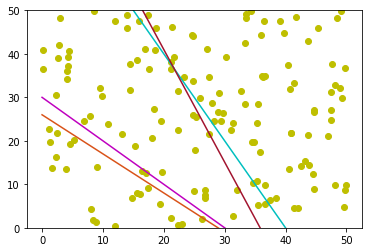

In [7]:
w1_1 = weights[0][0]
w2_1 = weights[0][1]
w1_2 = weights[1][0]
w2_2 = weights[1][1]
b1 = bias[0]
b2 = bias[1]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y,c='y')

x0 = np.linspace(0,50,100)
y_p1 = (-b1 - w1_1*x0)/w1_2
y_p2 = (-b2 - w2_1*x0)/w2_2
div1y = 30 - x0
div2y = 80 - 2*x0
ax1.plot(x0,div1y,'m')
ax1.plot(x0,div2y,'c')
ax1.plot(x0,y_p1,'#A2142F')
ax1.plot(x0,y_p2,'#D95319')
ax1.set_ylim(0,50)
plt.show()